# Challenge 3 DTS Data Science UKSW-B

Group 7:
1. Muhammad Arif Maula - 0157341141-11 (Business Understanding and Reporting)
2. Muhammad Irvan Avib Azizi - 0157341161-2 (Business Understanding)
3. Pratiwi Fitriana Haris - 0157341140-12 (Exploratory Data Analysis, Modeling, and Evaluation)

Topic: Human Development Index Prediction

For this challenge, we are predicting the Human Development Index in Indonesia's cities and regencies. The dataset that being used here is sourced from multiple data files at Indonesian Statistics Bureau (Badan Pusat Statistik)'s [website](https://bps.go.id), then we created a new dataset that summarizes the Human Development Index, Average of School Duration (years), Index of Gender Empowerment, Life Expectancy (years), and Poverty Population Percentages (%) of the cities and/or regencies in Indonesia.

# Exploratory Data Analysis

In [1]:
# Import the libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the dataset

data = pd.read_csv('city.csv')

In [3]:
# Get first 5 rows of the dataset

data.head()

,city,hdi,avg_sch_dur,gender_empwr,life_exp,pov_pop_perc
0,Simeulue,65.70,9.08,64.51,65.22,18.99
1,Aceh Singkil,68.91,8.52,59.72,67.36,20.78
2,Aceh Selatan,66.90,8.59,55.96,64.27,13.09
3,Aceh Tenggara,69.36,9.65,58.10,68.04,13.43
4,Aceh Timur,67.39,7.86,53.21,68.67,14.47


In [4]:
# Get the dataset info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          514 non-null    object 
 1   hdi           514 non-null    float64
 2   avg_sch_dur   514 non-null    float64
 3   gender_empwr  514 non-null    float64
 4   life_exp      514 non-null    float64
 5   pov_pop_perc  514 non-null    float64
dtypes: float64(5), object(1)
memory usage: 24.2+ KB


In [5]:
# Get the statistical description of the dataset

data.describe(include='all')

,city,hdi,avg_sch_dur,gender_empwr,life_exp,pov_pop_perc
count,514,514.000000,514.000000,514.000000,514.000000,514.000000
unique,514,NaN,NaN,NaN,NaN,NaN
top,Bulungan,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,69.524163,8.216167,64.366576,69.397160,11.972607
std,NaN,6.548357,1.649844,9.419125,3.486261,7.754665
min,NaN,30.750000,0.970000,31.570000,55.120000,1.680000
25%,NaN,66.330000,7.272500,57.780000,67.087500,6.660000
50%,NaN,69.170000,8.110000,65.155000,69.780000,9.695000
75%,NaN,72.765000,9.110000,70.845000,71.747500,14.760000


In [6]:
# Check if there is any missing values

data.isnull().values.any()

False

# Correlation of Each Variable

Text(0.5, 1.0, 'Heatmap Correlation on HDI Dataset')

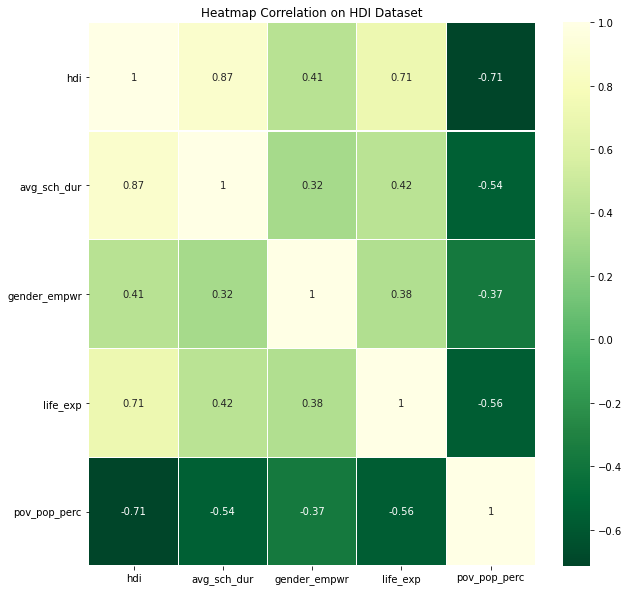

In [7]:
# Heatmap correlation of each variable

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGn_r", annot=True)
plt.yticks(rotation=0);
plt.title('Heatmap Correlation on HDI Dataset')

(0.0, 89.44500000000001)

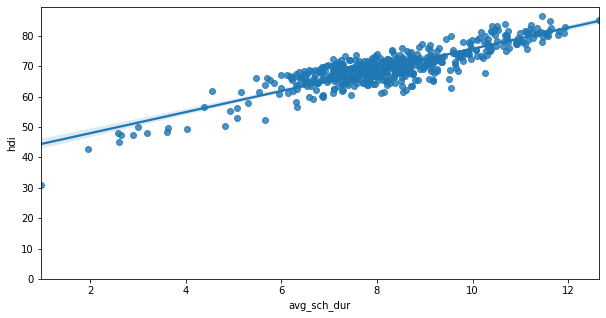

In [8]:
# Average School Duration vs HDI

width = 10
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="avg_sch_dur", y="hdi", data=data)
plt.ylim(0,)

We can see that Average School Duration has a positive correlation with HDI.

(0.0, 89.44500000000001)

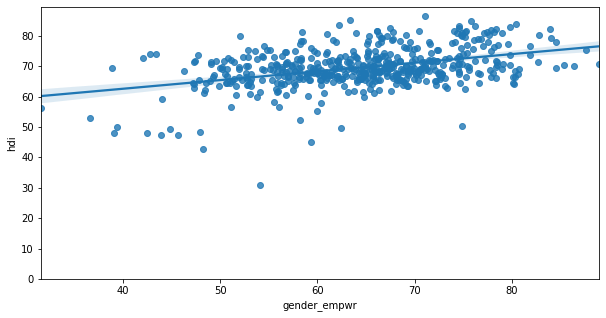

In [9]:
# Gender Empowerment vs HDI

width = 10
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="gender_empwr", y="hdi", data=data)
plt.ylim(0,)

We can see that Gender Empowerment Index has a positive correlation with HDI.

(0.0, 89.44500000000001)

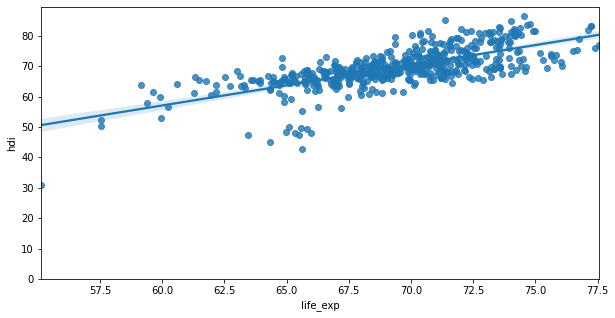

In [10]:
# Life Expectancy vs HDI

width = 10
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="life_exp", y="hdi", data=data)
plt.ylim(0,)

We can see that Life Expectancy has a positive correlation with HDI.

(0.0, 89.44500000000001)

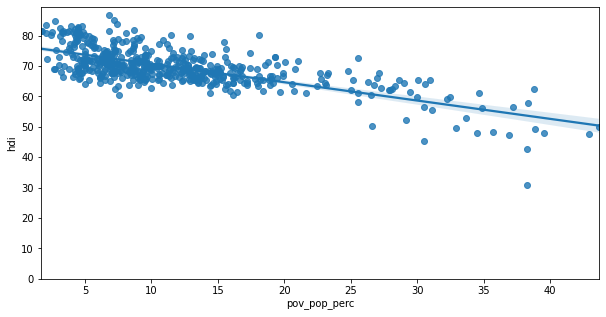

In [11]:
# Poverty Population Percentage vs HDI

width = 10
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="pov_pop_perc", y="hdi", data=data)
plt.ylim(0,)

We can see that Poverty Population Percentages has a negative correlation with HDI.

# Modeling and Evaluation

Predicting HDI using Multiple Linear Regression

In [12]:
# Defining predictors and predicted variable

x = data[['avg_sch_dur', 'gender_empwr', 'life_exp', 'pov_pop_perc']]
y = data['hdi']

In [13]:
# Import Linear Model from SKLearn Library and fit the data into the model

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Get the value of coefficients and intercept

print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [ 2.51536142  0.00955986  0.6322969  -0.14859441]
Intercept:  6.141651448351411


In [15]:
# Predicting y_hat

y_hat = regr.predict(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


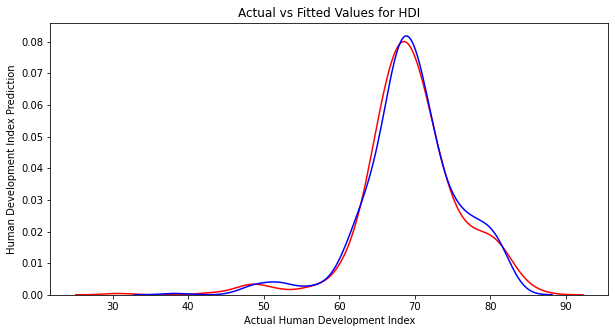

In [16]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(data['hdi'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for HDI')
plt.xlabel('Actual Human Development Index')
plt.ylabel('Human Development Index Prediction')

plt.show()
plt.close()

In [17]:
# Get model's accuracy

from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Mean absolute error: 1.40
Residual sum of squares (MSE): 3.29
R2-score: 0.92


We were wondering if we can increase R2 score so we're trying predicting HDI using Multiple Linear Regression with Train Test Split

In [18]:
# Import library and making linear model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [19]:
# Defining predictor and predicted variable

X = data.iloc[:,2::]
Y = data.iloc[:,1]

In [20]:
# Import train test split library

from sklearn.model_selection import train_test_split

In [26]:
# Splitting dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [27]:
# Fit the data into the model

reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Get the coefficients and intercept

print ('Coefficients: ', reg.coef_)
print ('Intercept: ', reg.intercept_)

Coefficients:  [ 2.54584     0.01856637  0.64866869 -0.13678029]
Intercept:  3.973941353268387


In [29]:
# Testing data and get accuracy

reg.score(X_test, Y_test)

0.9343402527694199

In [30]:
# Get y_hat value for this model and then plot it

y_hat2 = reg.predict(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


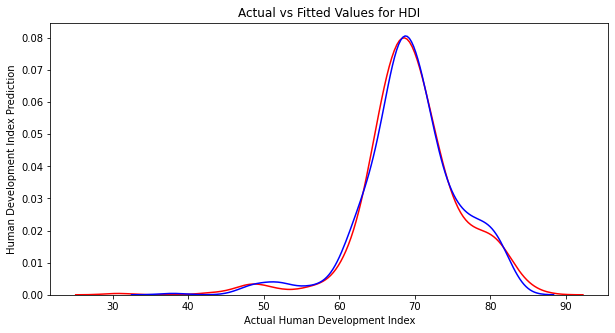

In [32]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(data['hdi'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for HDI')
plt.xlabel('Actual Human Development Index')
plt.ylabel('Human Development Index Prediction')

plt.show()
plt.close()

We were still not satisfied, so we were applying Gradient Boosting Regressor, in case we can increase accuracy up to 95%

In [38]:
# Import library
from sklearn import ensemble

# Making Gradient Boosting Regressor model
clf = ensemble.GradientBoostingRegressor(n_estimators = 300, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'ls')

# Fit the data into the model
clf.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
# Get parameters of this model

clf.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [39]:
# Testing the data and get accuracy score

clf.score(X_test, Y_test)

0.9128056818432296

Turns out after using Gradient Boosting Regressor, there are no improvement in accuracy. It even decreasing from the accuracy of the previous model. We were tuning the parameter of n_estimators from 50, 100, 200, and 300. The accuracy result is plateau'd around 91%.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


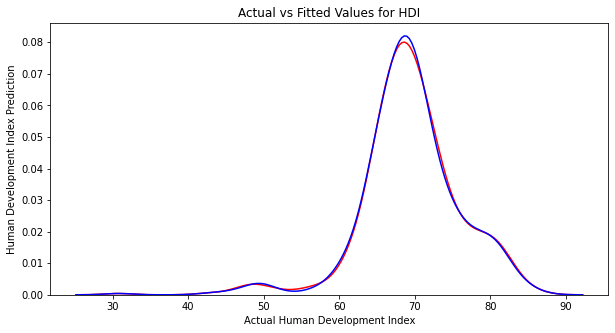

In [40]:
# Get y_hat3 value so we can plot it

y_hat3 = clf.predict(x)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(data['hdi'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat3, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for HDI')
plt.xlabel('Actual Human Development Index')
plt.ylabel('Human Development Index Prediction')

plt.show()
plt.close()

From the graph above we can see that the predicted result is pretty much the same as the actual result. In this case, it is indicating that the model is overfitting.